# Linear Regression Syntax 

The most simple syntax to train a linear regression using scikit learn is:

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR = LR.fit(X_train, y_train) 

To score a data frame X_test you would use this syntax:

y_predict = LR.predict(X_test)  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
data=pd.read_pickle("C:\\Users\\soyam\\Desktop\\boston_housing_clean.pickle")

In [4]:
data['dataframe']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<Axes: >

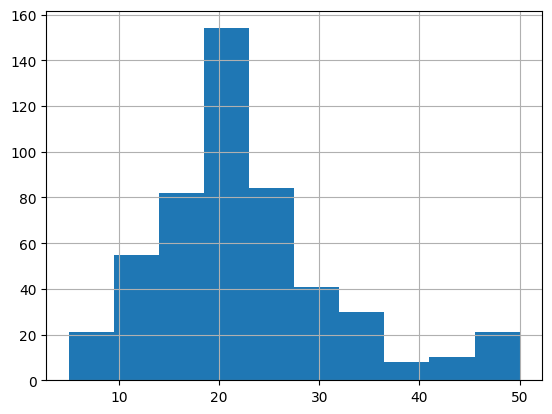

In [6]:
data['dataframe'].MEDV.hist()

In [7]:
from scipy.stats.mstats import normaltest

In [8]:
normaltest(data['dataframe'].MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

In [14]:
log_medv=np.log(data['dataframe'].MEDV)

<Axes: >

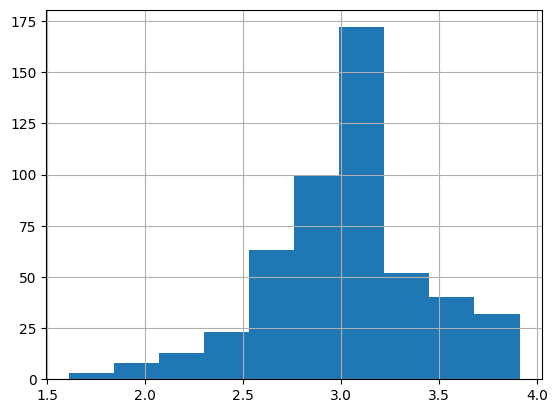

In [15]:
log_medv.hist()

In [17]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

(array([[424.,  73.,   6.,   3.,   0.,   0.,   0.,   0.,   0.,   0.],
        [372.,  60.,  39.,  35.,   0.,   0.,   0.,   0.,   0.,   0.],
        [202., 304.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [452.,  54.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  7.,  50., 139., 310.,   0.,   0.,   0.,   0.,   0.,   0.],
        [460.,  46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [350., 156.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  77., 190., 101.,   1., 137.],
        [  0., 506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  6.,  10.,   6.,  12.,   4.,   8.,  34., 426.,   0.,   0.],
        [128., 359.,  19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  6., 401.,  99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.       

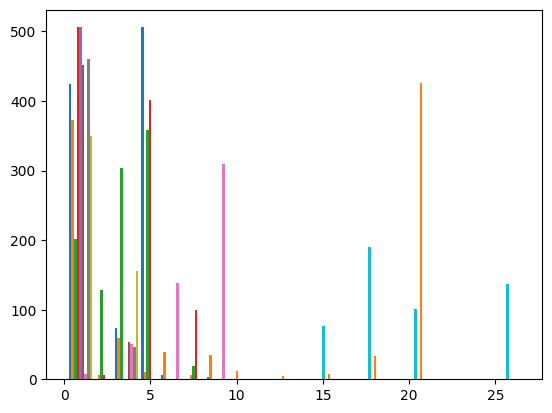

In [19]:
plt.hist(np.sqrt(data['dataframe']))

In [20]:
sqrt_medv=np.sqrt(data['dataframe'].MEDV)

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

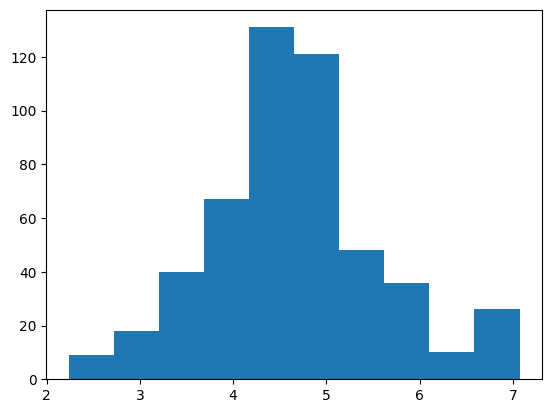

In [22]:
plt.hist(sqrt_medv)

In [23]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

In [24]:
from scipy.stats import boxcox

In [25]:
bc_result=boxcox(data['dataframe'].MEDV)

In [26]:
boxcox_medv=bc_result[0]
lam=bc_result[1]
lam

0.2166209012915364

In [27]:
data['dataframe']['MEDV'].hist

<bound method hist_series of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

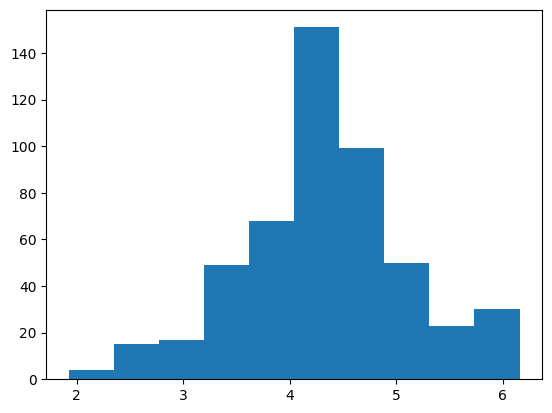

In [29]:
plt.hist(boxcox_medv)

In [30]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [33]:
lr=LinearRegression()

In [34]:
df=data['dataframe']

In [35]:
y_col="MEDV"
X=df.drop(y_col, axis=1)

In [36]:
Y=df[y_col]

In [37]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, Y, test_size=0.3, 
                                                    random_state=72018)

In [40]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [41]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [42]:
y_train_bc.shape

(354,)

In [44]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
Y_pred_bc = lr.predict(X_test_s)

In [45]:
from scipy.special import inv_boxcox

In [47]:
# code from above
bc_result = boxcox(df.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [48]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [49]:
df['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [51]:
y_pred_tran = inv_boxcox(Y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.879863574824817

# Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [52]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.8558518908813423

In [53]:
##IT IS LOWER